# Inflação por faixa de renda — API do ipeadatapy!

A inflação por faixa de renda detalha como o “imposto invisível” age de diferentes formas em cada parcela da população. O que pouca gente sabe é que ela também pode revelar efeitos de redistribuição de renda.

Vou utilizar a API do ipeadatapy para extrair os dados do site do IPEA, trata-los e depois plotar os gráficos. Peguei uma tabela do último relatório do IPEA, referente ao mês de abril para analisarmos a inflação acumulada em 12 meses também.

De acordo com a metodologia do IPEA, as faixas de renda desde junho de 2021 estão definidas da seguinte forma:

### Bibliotecas:

In [8]:
# instala a biblioteca ipeadatapy , já que não é padrão no Google Colab:
!pip install ipeadatapy

# carregando as bibliotecas usadas:
import ipeadatapy as ipea
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

### Coleta de dados:

In [9]:
# Códigos das séries no banco de dados do IPEA:
indicadores = {
    "DIMAC_INF1": "Renda_muito_baixa",
    "DIMAC_INF2": "Renda_baixa",
    "DIMAC_INF3": "Renda_média_baixa",
    "DIMAC_INF4": "Renda_média",
    "DIMAC_INF5": "Renda_média_alta",
    "DIMAC_INF6": "Renda_alta"
}

# coleta os dados:
dados_brutos = list()
for codigo in indicadores.keys():
  dados_brutos.append(ipea.timeseries(codigo))

print(dados_brutos)

[                  CODE                   RAW DATE  DAY  MONTH  YEAR  \
DATE                                                                  
2006-07-01  DIMAC_INF1  2006-07-01T00:00:00-03:00    1      7  2006   
2006-08-01  DIMAC_INF1  2006-08-01T00:00:00-03:00    1      8  2006   
2006-09-01  DIMAC_INF1  2006-09-01T00:00:00-03:00    1      9  2006   
2006-10-01  DIMAC_INF1  2006-10-01T00:00:00-03:00    1     10  2006   
2006-11-01  DIMAC_INF1  2006-11-01T00:00:00-03:00    1     11  2006   
...                ...                        ...  ...    ...   ...   
2023-12-01  DIMAC_INF1  2023-12-01T00:00:00-03:00    1     12  2023   
2024-01-01  DIMAC_INF1  2024-01-01T00:00:00-03:00    1      1  2024   
2024-02-01  DIMAC_INF1  2024-02-01T00:00:00-03:00    1      2  2024   
2024-03-01  DIMAC_INF1  2024-03-01T00:00:00-03:00    1      3  2024   
2024-04-01  DIMAC_INF1  2024-04-01T00:00:00-03:00    1      4  2024   

            VALUE ((% a.m.))  
DATE                          
2006-07-01   

### Tratamento de dados:

In [10]:
# Tratamento dos dados:
dados = (
    pd.concat(dados_brutos)
    .replace(indicadores)
    .pivot(columns = "CODE", values = "VALUE ((% a.m.))")
    .rolling(window = 12)
    .apply(lambda x: ((x / 100 + 1).prod() -1) * 100, raw = False)
    .rename_axis("", axis="columns")
)

dados

,Renda_alta,Renda_baixa,Renda_muito_baixa,Renda_média,Renda_média_alta,Renda_média_baixa
DATE,,,,,,
2006-07-01,NaN,NaN,NaN,NaN,NaN,NaN
2006-08-01,NaN,NaN,NaN,NaN,NaN,NaN
2006-09-01,NaN,NaN,NaN,NaN,NaN,NaN
2006-10-01,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-12-01,6.215795,3.720034,3.270696,4.833130,5.151404,4.276635
2024-01-01,5.666356,3.838723,3.467041,4.651153,4.936566,4.245236
2024-02-01,5.441606,3.911349,3.560634,4.628613,4.906457,4.288002


### Visualização de dados:

Finalizada esta etapa de preparação da base de dados, peguemos o primeiro gráfico. Já sabemos quais são as faixas de renda determinadas pelo IPEA. Vamos verificar se a afirmação faz sentido olhando no gráfico?

<Axes: title={'center': 'Inflação por faixa de renda\nVar. %, acum. 12 meses, IPEA'}>

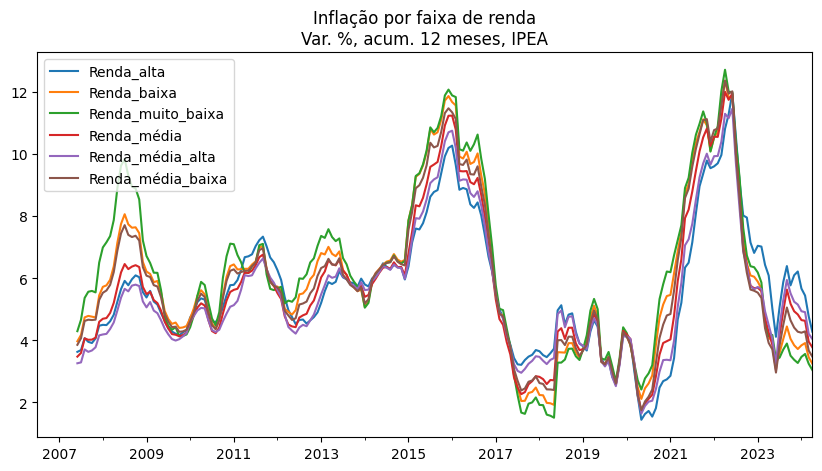

In [11]:
# vizualiza os dados:
dados.plot(
    figsize=(10,5),
    title="Inflação por faixa de renda\nVar. %, acum. 12 meses, IPEA",
    xlabel = ""
)

O gráfico mostra a inflação em percentual (%) acumulada nos últimos 12 meses. Se observarmos a legenda veremos que cada linha representa uma faixa de renda. Agora, observe o comportamento do gráfico, em 2023 a partir do momento que as linhas começam a subir.

Temos a seguinte ordem de faixas de renda: Renda alta, Renda média-alta, Renda média, Renda média-baixa, Renda baixa e por último em verde Renda muito baixa.

Isso indica que temos uma pressão maior nos preços de serviços prestados. Ocasionado pelo reajuste dos valores cobrados por quem os oferta. E que são serviços que as faixas de renda mais baixas em geral não tem acesso, seu consumo muito restrito a itens básicos.

(Outra parte do gráfico com um comportamento parecido é no período de meados de 2017 e 2018)


Isso é uma forma de redistribuição de renda causada pela inflação. E para deixar claro, isso não indica que inflação é boa, de forma alguma mas é um efeito que podemos observar a partir dela.

In [12]:
# Agora vou puxar novamente os dados sem o acumulado de 12 meses, preciso dos dados mensais para o grafico 2:

indicadores = {
    "DIMAC_INF1": "Renda_muito_baixa",
    "DIMAC_INF2": "Renda_baixa",
    "DIMAC_INF3": "Renda_média_baixa",
    "DIMAC_INF4": "Renda_média",
    "DIMAC_INF5": "Renda_média_alta",
    "DIMAC_INF6": "Renda_alta"
}

# coleta os dados:
dados_brutos_mes = list()
for codigo in indicadores.keys():
  dados_brutos_mes.append(ipea.timeseries(codigo))

# Tratamento de dados:
dados_mensais = (
    pd.concat(dados_brutos_mes)
    .replace(indicadores)
    .pivot(columns="CODE", values="VALUE ((% a.m.))")
)
dados_mensais

CODE,Renda_alta,Renda_baixa,Renda_muito_baixa,Renda_média,Renda_média_alta,Renda_média_baixa
DATE,,,,,,
2006-07-01,0.172404,0.095983,0.068795,0.143487,0.161637,0.112550
2006-08-01,0.056847,0.000182,-0.012428,0.005555,-0.001066,0.006135
2006-09-01,0.254442,0.244530,0.237790,0.228291,0.204228,0.224924
2006-10-01,0.299242,0.507814,0.589476,0.377531,0.287329,0.464574
2006-11-01,0.247047,0.577165,0.729772,0.370967,0.268429,0.512432
...,...,...,...,...,...,...
2023-12-01,0.617652,0.552713,0.613193,0.522813,0.506891,0.557718
2024-01-01,0.038741,0.585719,0.660291,0.373550,0.381049,0.490147
2024-02-01,0.833337,0.791521,0.778916,0.850815,0.882752,0.810747


In [13]:
df = pd.DataFrame(data=dados_mensais,
                  index=['2023-04-01', '2024-04-01'],
                  columns=['Renda_alta','Renda_baixa','Renda_muito_baixa','Renda_média','Renda_média_alta','Renda_média_baixa'])

col_inflação = df.mean(axis=1)

df.insert(0, 'Inflação', col_inflação)
df

,Inflação,Renda_alta,Renda_baixa,Renda_muito_baixa,Renda_média,Renda_média_alta,Renda_média_baixa
2023-04-01,0.609490,0.675168,0.608473,0.603912,0.586139,0.590874,0.592375
2024-04-01,0.377391,0.201510,0.410782,0.408089,0.411602,0.430173,0.402190


Abaixo o segundo gráfico, indica uma queda em percentual na inflação por faixa de renda de Abril/23 para Abril/24. Ocasionada por repasses menores de alguns itens da cesta de produtos este ano, por exemplo:





Tarifas de energia elétrica
2023: 0,48% — 2024: -0,46%

Preço de medicamentos
2023: 3,6% — 2024: 2,96%

Preço de planos de saúde
2023: 1,2% — 2024: 0,76%

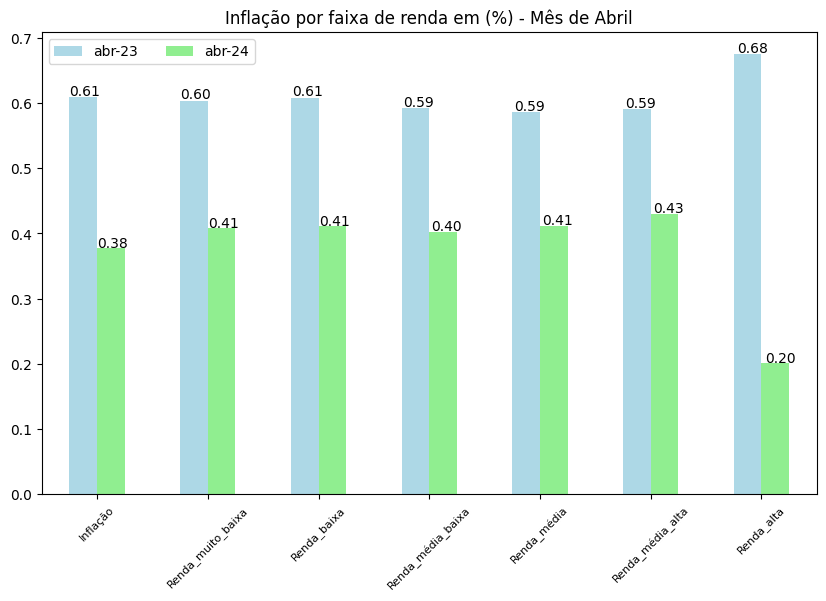

In [14]:
df = pd.DataFrame(data=dados_mensais,
                  index=['2023-04-01', '2024-04-01'],
                  columns=['Renda_muito_baixa','Renda_baixa','Renda_média_baixa','Renda_média','Renda_média_alta','Renda_alta'])
col_inflação = df.mean(axis=1)
df.insert(0, 'Inflação', col_inflação)

df_transposta = df.transpose()
cores = ['lightblue', 'lightgreen']
ax = df_transposta.plot(kind='bar', figsize=(10, 6), color=cores)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() * 1.005, p.get_height() * 1.005))

plt.title('Inflação por faixa de renda em (%) - Mês de Abril')
plt.xticks(fontsize=8)
plt.xticks(rotation=45)
plt.legend(['abr-23', 'abr-24'], fancybox=True, ncol=2)

plt.show()